## Project : Understanding how human intervention can cause racism in ML Models
## Logistic Regression to predict whether a customer will get a loan or not

- The following bank dataset contains customer demographics information like Gender, Marital Status, Locality, Education, Income etc which has been used to predict bank loan status (Yes/No) with the use of logistic regression.

- In order to showcase that the machines can easily pick up racism if the dataset is made by someone who has racist beliefs and how bad it can impact the outcome of the model.

- All bank forms contain the column known as "Address". Suppose, if a customer lives in a highly segregated localities or ghettos and a highly racist loan officer is responsible to evaluate the customers. There is a high chance, he/she won't give loan to the well deserved customer just because the person is from other race than the loan officer.

In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the treated csv file. The original file name is future.xlsx
df = pd.read_csv("final_df1.csv")

In [3]:
## Generating a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         676 non-null    int64 
 1   Loan_ID            676 non-null    object
 2   Loan_Status        676 non-null    object
 3   Gender             676 non-null    object
 4   Married            676 non-null    object
 5   Locality           676 non-null    object
 6   Dependents         676 non-null    int64 
 7   Education          676 non-null    object
 8   Self_Employed      676 non-null    object
 9   ApplicantIncome    676 non-null    int64 
 10  CoapplicantIncome  676 non-null    int64 
 11  LoanAmount         676 non-null    int64 
 12  Loan_Amount_Term   676 non-null    int64 
 13  Credit_History     676 non-null    int64 
 14  Property_Area      676 non-null    object
dtypes: int64(7), object(8)
memory usage: 79.3+ KB


In [4]:
## Dropping a useless column from the dataframe
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
## To see if changes have been updated in the dataframe
df.head()

,Loan_ID,Loan_Status,Gender,Married,Locality,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001996,N,Male,No,"Qureshi Square, New Delhi",0,Graduate,No,20233,0,480,360,1,Rural
1,LP002191,N,Male,Yes,"Qureshi Square, New Delhi",0,Graduate,No,19730,5266,570,360,1,Rural
2,LP002699,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,17500,0,400,360,1,Rural
3,LP002527,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,16525,1014,150,360,1,Rural
4,LP002065,Y,Male,Yes,"Qureshi Square, New Delhi",3,Graduate,No,15000,0,300,360,1,Rural


### Exploratory Data Analysis

In [6]:
# Creating a new numerical column called Loan_Status_num from the existing target variable called "Loan_Status" 

df["Loan_Status_num"] = np.where(df.Loan_Status=="Y", 1,0)

In [7]:
df.head()

,Loan_ID,Loan_Status,Gender,Married,Locality,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_num
0,LP001996,N,Male,No,"Qureshi Square, New Delhi",0,Graduate,No,20233,0,480,360,1,Rural,0
1,LP002191,N,Male,Yes,"Qureshi Square, New Delhi",0,Graduate,No,19730,5266,570,360,1,Rural,0
2,LP002699,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,17500,0,400,360,1,Rural,1
3,LP002527,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,16525,1014,150,360,1,Rural,1
4,LP002065,Y,Male,Yes,"Qureshi Square, New Delhi",3,Graduate,No,15000,0,300,360,1,Rural,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            676 non-null    object
 1   Loan_Status        676 non-null    object
 2   Gender             676 non-null    object
 3   Married            676 non-null    object
 4   Locality           676 non-null    object
 5   Dependents         676 non-null    int64 
 6   Education          676 non-null    object
 7   Self_Employed      676 non-null    object
 8   ApplicantIncome    676 non-null    int64 
 9   CoapplicantIncome  676 non-null    int64 
 10  LoanAmount         676 non-null    int64 
 11  Loan_Amount_Term   676 non-null    int64 
 12  Credit_History     676 non-null    int64 
 13  Property_Area      676 non-null    object
 14  Loan_Status_num    676 non-null    int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 76.7+ KB


In [9]:
# Creating a pivot table for Education and Locality with numerical values = Loan_Status_num

heat1 = pd.pivot_table(data=df, index="Education", columns="Locality", values="Loan_Status_num")

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

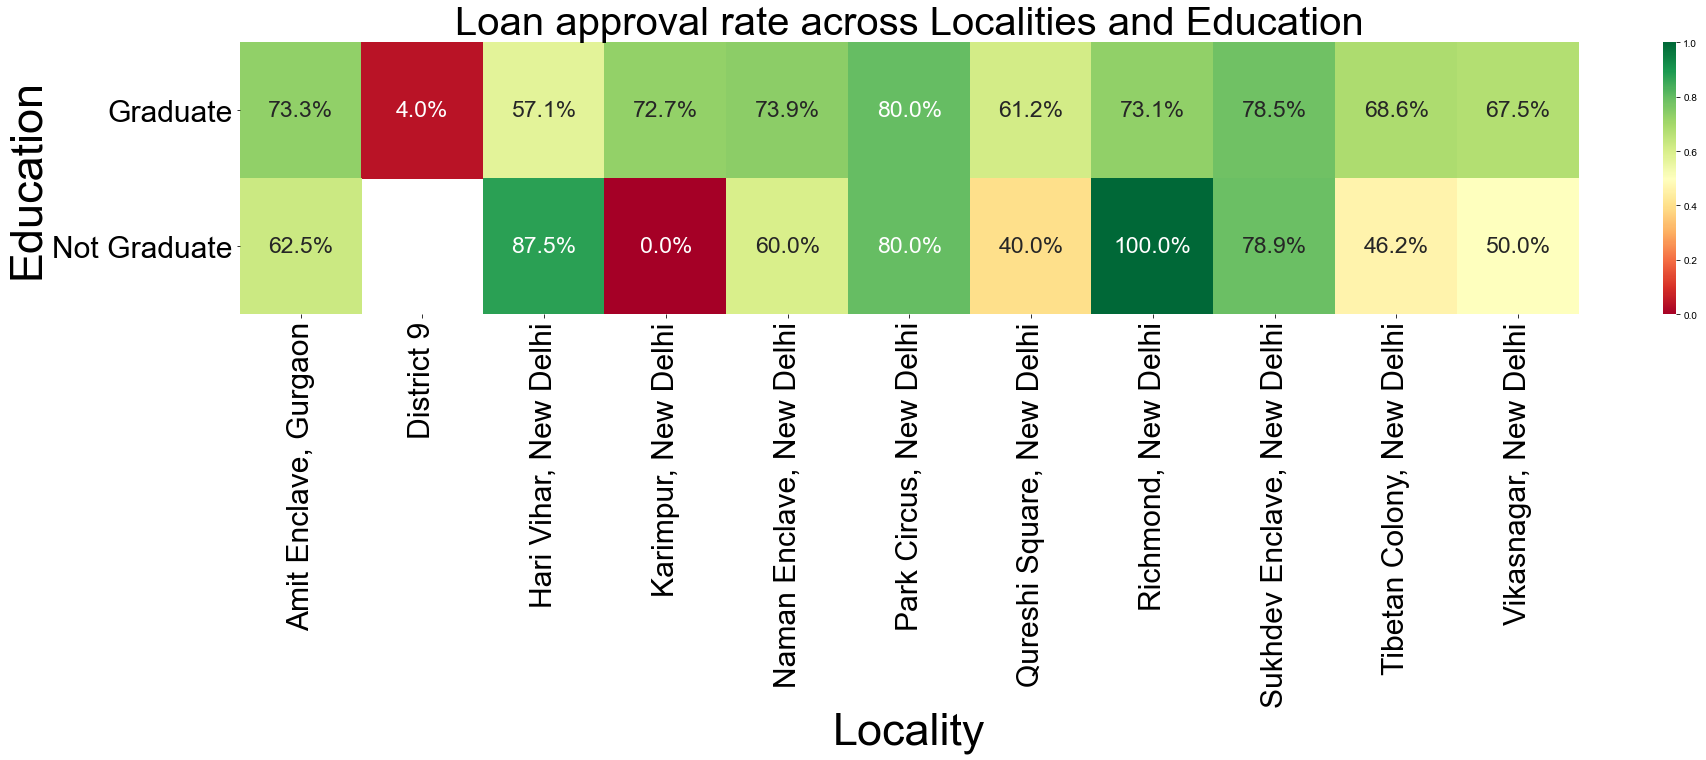

In [11]:
# Education Vs. Locality with Loan Conversion Rate

plt.figure(figsize=(30,5))
g2 = sns.heatmap(heat1, cmap="RdYlGn" ,fmt=".1%",annot = True, annot_kws={"size":23})
g2.set_ylabel("Education", fontsize = 45)
g2.set_xlabel("Locality", fontsize = 45)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30,rotation=0)
sns.set(font_scale=1.8)
plt.title("Loan approval rate across Localities and Education", size=40,y=1.05)
plt.show()

### Inferences:
- Locality named "District 9" has the lowest loan conversion rate even when all of customers in the dataset are Graduate
- All the other localities are performing more or less the same with respect to Education level.

In [12]:
## Making a pivot table in order to generate a heat map
heat2 = pd.pivot_table(data=df, index="Property_Area", columns="Locality", values="Loan_Status_num")

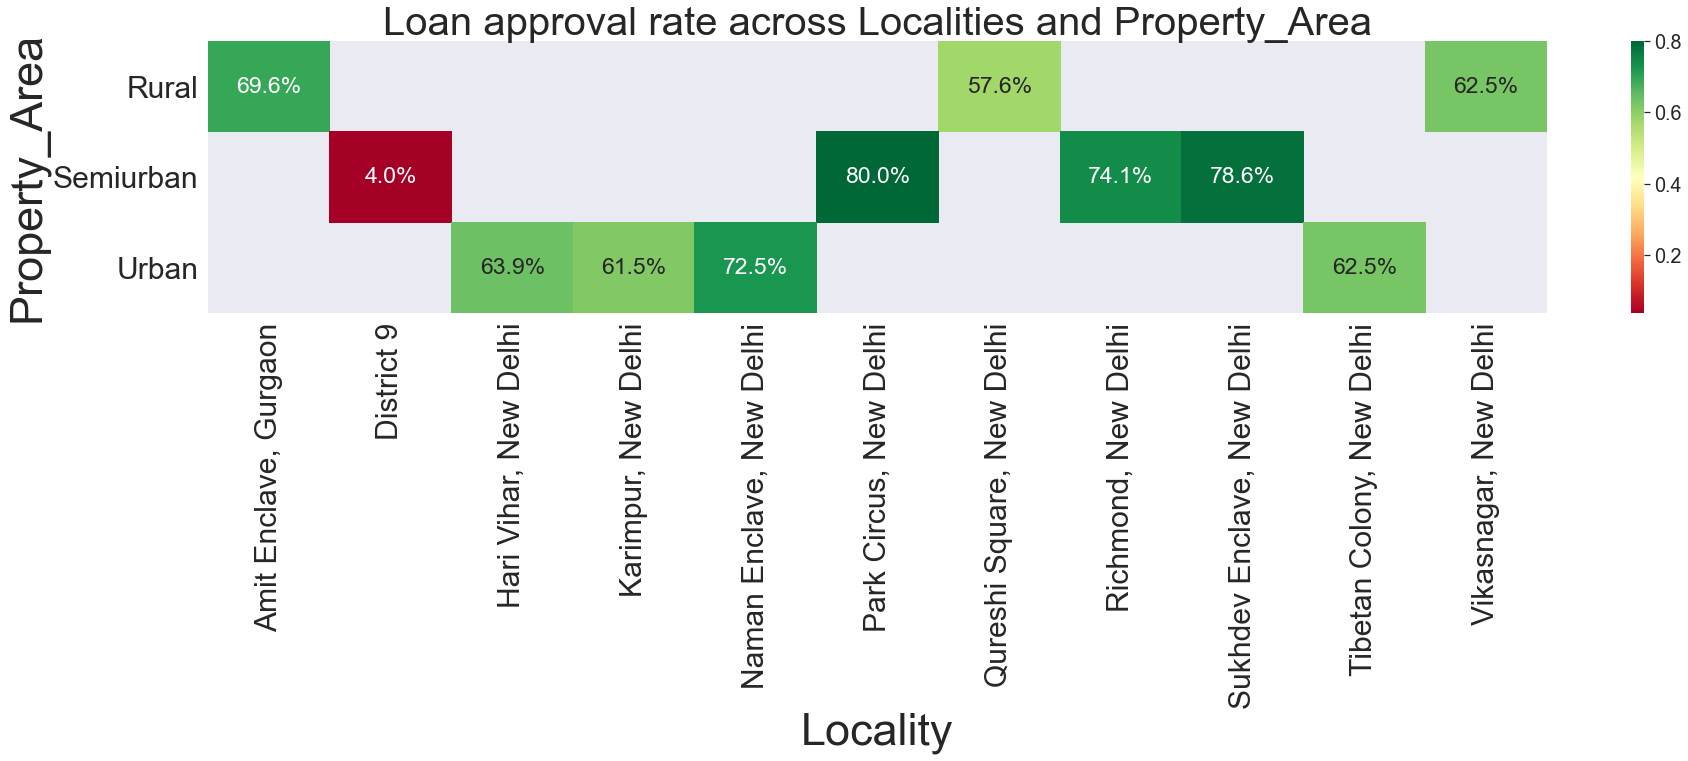

In [13]:
# Property_Area Vs. Locality with Lead Conversion Rate

plt.figure(figsize=(30,5))
g2 = sns.heatmap(heat2, cmap="RdYlGn" ,fmt=".1%",annot = True, annot_kws={"size":23})
g2.set_ylabel("Property_Area", fontsize = 45)
g2.set_xlabel("Locality", fontsize = 45)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30,rotation=0)
sns.set(font_scale=1.8)
plt.title("Loan approval rate across Localities and Property_Area", size=40,y=1.05)
plt.show()

In [ ]:
### Visualizing Boxplots

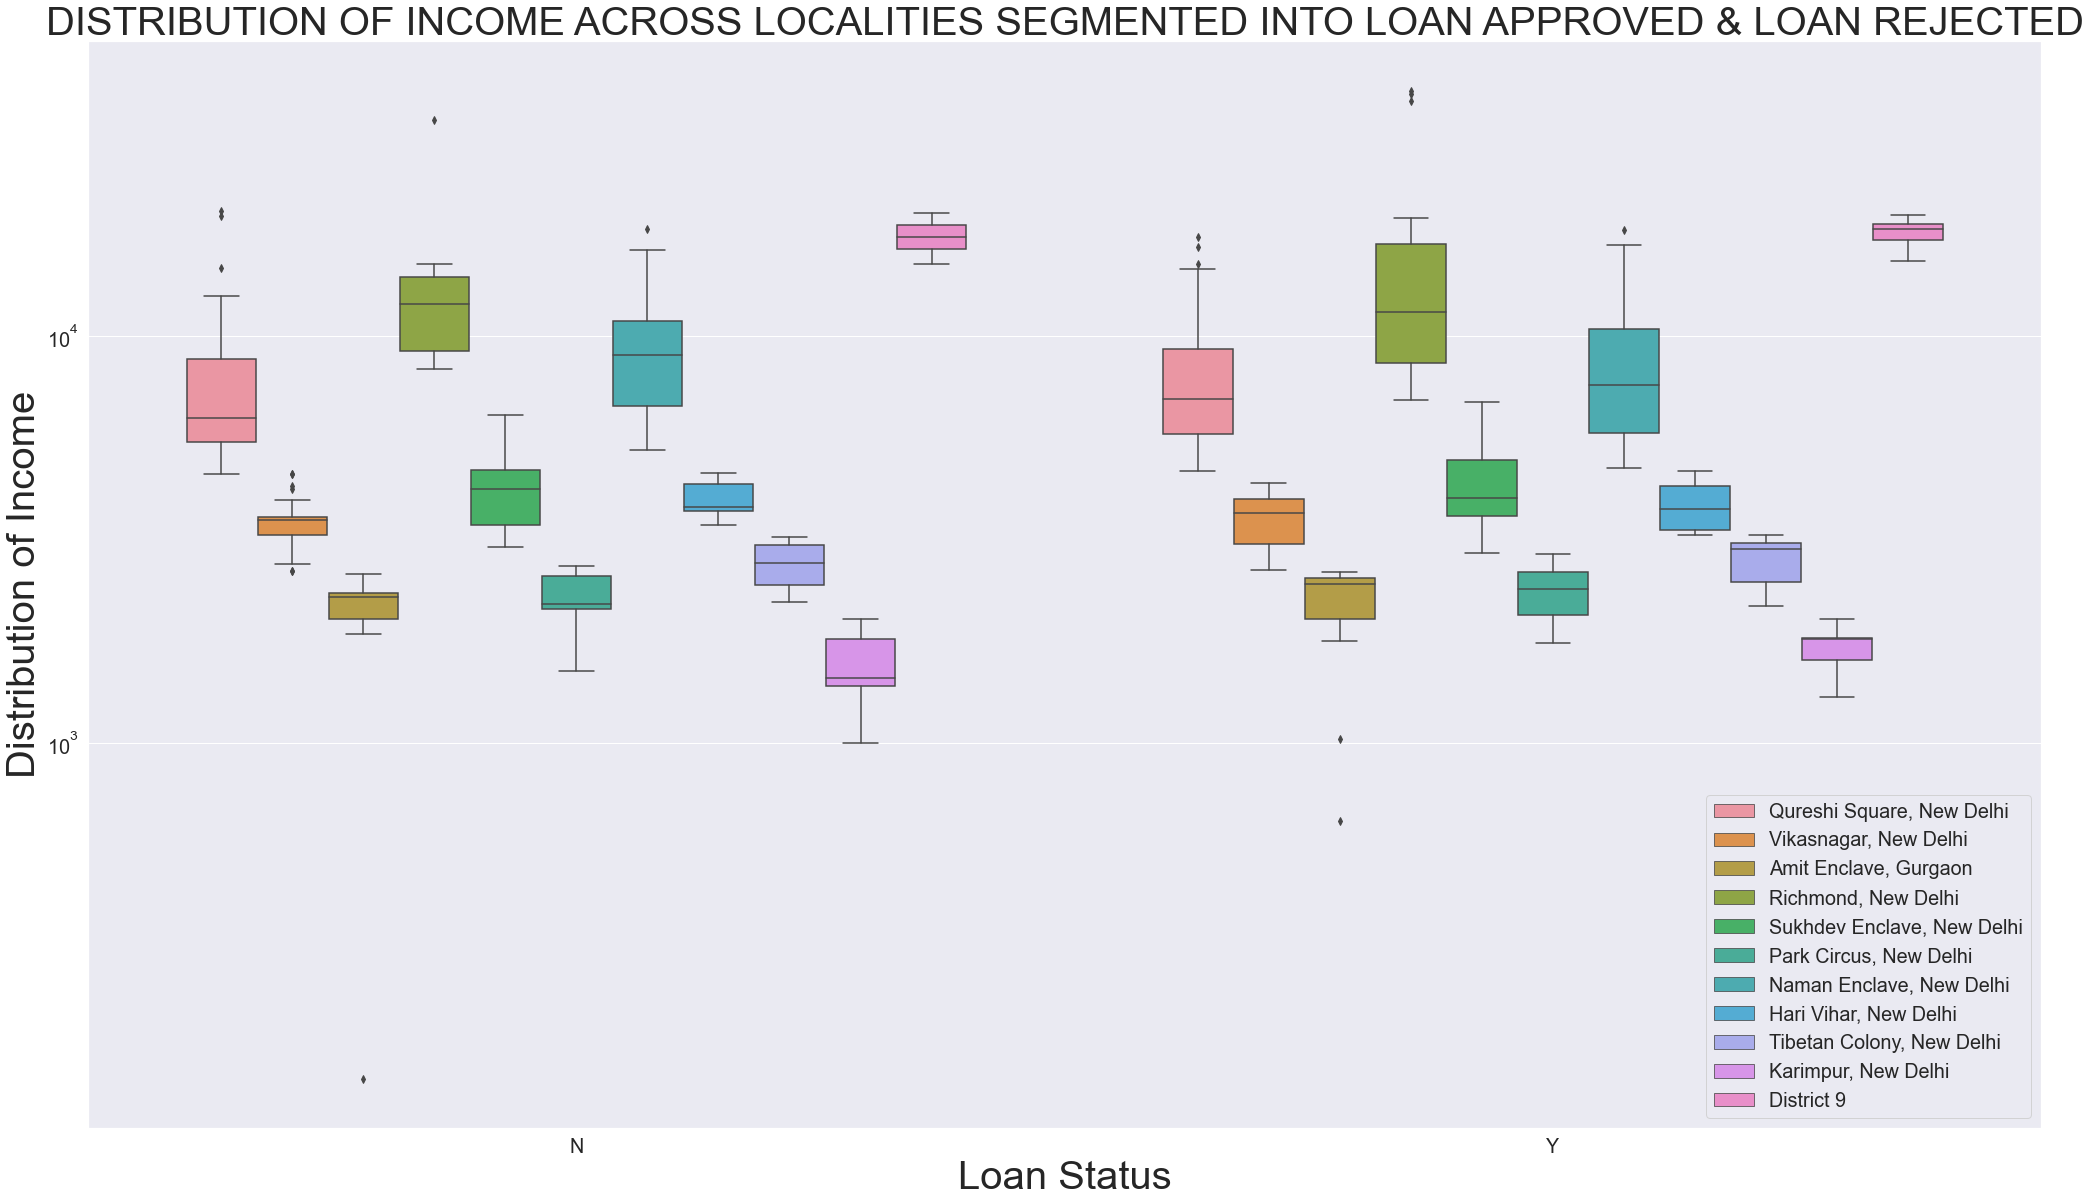

In [14]:
## Distribution of Income across Income Groups segmented across Defaulters and Non Defaulters

plt.figure(figsize=(35,20))
plt.yscale("log")
sns.set_style("dark")
sns.boxplot(data=df, x="Loan_Status", y="ApplicantIncome", hue="Locality")
plt.title("DISTRIBUTION OF INCOME ACROSS LOCALITIES SEGMENTED INTO LOAN APPROVED & LOAN REJECTED", size=40)
plt.xlabel("Loan Status", size=40)
plt.legend(loc="best")
plt.ylabel("Distribution of Income", size=40)
plt.show()

### Inferences:
- The "District 9" earns the highest income compared to the remaining localities 
- The Richmond Enclave and Qureshi Square are trailing at 2nd and 3rd position respectively 

In [15]:
## Dropping the categorical variable "Loan_Status" as a new numerical column has been created
df = df.drop("Loan_Status", axis=1)

In [16]:
df.head()

,Loan_ID,Gender,Married,Locality,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_num
0,LP001996,Male,No,"Qureshi Square, New Delhi",0,Graduate,No,20233,0,480,360,1,Rural,0
1,LP002191,Male,Yes,"Qureshi Square, New Delhi",0,Graduate,No,19730,5266,570,360,1,Rural,0
2,LP002699,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,17500,0,400,360,1,Rural,1
3,LP002527,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,16525,1014,150,360,1,Rural,1
4,LP002065,Male,Yes,"Qureshi Square, New Delhi",3,Graduate,No,15000,0,300,360,1,Rural,1


## Step 3: Data Preparation


### Converting the binary variables to 0/1

In [17]:
# List of variables to map

binlist1 =  ['Married', 'Self_Employed']

# Defining the map function
def binary_map1(x):
    return x.map({'Yes': 1, "No": 0})

binlist2 =  ['Education']
def binary_map2(a):
    return a.map({'Graduate': 1, "Not Graduate": 0})

binlist3 =  ['Gender']
def binary_map3(b):
    return b.map({'Male': 1, "Female": 0})


# Applying the function to the leads list
df[binlist1] = df[binlist1].apply(binary_map1)
df[binlist2] = df[binlist2].apply(binary_map2)
df[binlist3] = df[binlist3].apply(binary_map3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            676 non-null    object
 1   Gender             676 non-null    int64 
 2   Married            676 non-null    int64 
 3   Locality           676 non-null    object
 4   Dependents         676 non-null    int64 
 5   Education          676 non-null    int64 
 6   Self_Employed      676 non-null    int64 
 7   ApplicantIncome    676 non-null    int64 
 8   CoapplicantIncome  676 non-null    int64 
 9   LoanAmount         676 non-null    int64 
 10  Loan_Amount_Term   676 non-null    int64 
 11  Credit_History     676 non-null    int64 
 12  Property_Area      676 non-null    object
 13  Loan_Status_num    676 non-null    int32 
dtypes: int32(1), int64(10), object(3)
memory usage: 71.4+ KB


### Converting the categorical variables into dummy variables

In [19]:
# Creating dummy variables for the categorical variables. 
# and dropping those variables the first

# Creating dummy variables for the variable 'Locality'
lo = pd.get_dummies(df['Locality'])
# Dropping Sukhdev Enclave, New Delhi column
lo1 = lo.drop(['Sukhdev Enclave, New Delhi'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,lo1], axis=1)

# Creating dummy variables for the variable 'Property Area'
pa = pd.get_dummies(df['Property_Area'])
# Dropping Sukhdev Enclave column
pa1 = pa.drop(['Rural'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,pa1], axis=1)

In [20]:
# Since we have created dummies for the below variables, so we can drop them

df = df.drop(['Locality','Property_Area'], 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Loan_ID                    676 non-null    object
 1   Gender                     676 non-null    int64 
 2   Married                    676 non-null    int64 
 3   Dependents                 676 non-null    int64 
 4   Education                  676 non-null    int64 
 5   Self_Employed              676 non-null    int64 
 6   ApplicantIncome            676 non-null    int64 
 7   CoapplicantIncome          676 non-null    int64 
 8   LoanAmount                 676 non-null    int64 
 9   Loan_Amount_Term           676 non-null    int64 
 10  Credit_History             676 non-null    int64 
 11  Loan_Status_num            676 non-null    int32 
 12  Amit Enclave, Gurgaon      676 non-null    uint8 
 13  District 9                 676 non-null    uint8 
 14  Hari Vihar

## Train-Test Split

In [22]:
# Importing the required libraries
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variable to X
X = df.drop(['Loan_Status_num', 'Loan_ID'], axis=1)

X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,"Hari Vihar, New Delhi","Karimpur, New Delhi","Naman Enclave, New Delhi","Park Circus, New Delhi","Qureshi Square, New Delhi","Richmond, New Delhi","Tibetan Colony, New Delhi","Vikasnagar, New Delhi",Semiurban,Urban
0,1,0,0,1,0,20233,0,480,360,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,19730,5266,570,360,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,2,1,1,17500,0,400,360,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,2,1,1,16525,1014,150,360,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,1,0,15000,0,300,360,1,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Putting response variable to y
y = df['Loan_Status_num']

y.head()

0    0
1    0
2    1
3    1
4    1
Name: Loan_Status_num, dtype: int32

#### First we will divide the data into train-test set

In [25]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
# Calculating the lead rate
loan_rate = (sum(df['Loan_Status_num'])/len(df['Loan_Status_num'].index))*100
print("The Loan Rate = ", loan_rate)

The Loan Rate =  50.14792899408283


### Feature Scaling

In [27]:
### Importing the required libraries
from sklearn.preprocessing import StandardScaler

In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaler = StandardScaler()

X_train[['Loan_Amount_Term','Dependents','ApplicantIncome', "CoapplicantIncome", "LoanAmount"]] = scaler.fit_transform(X_train[['Loan_Amount_Term','Dependents','ApplicantIncome', "CoapplicantIncome", "LoanAmount"]])

X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,"Hari Vihar, New Delhi","Karimpur, New Delhi","Naman Enclave, New Delhi","Park Circus, New Delhi","Qureshi Square, New Delhi","Richmond, New Delhi","Tibetan Colony, New Delhi","Vikasnagar, New Delhi",Semiurban,Urban
593,1,1,-0.591048,1,0,1.329861,-0.249316,-0.049490,0.259652,1,...,0,0,0,0,0,0,0,0,1,0
270,1,1,-0.591048,1,0,-0.856313,1.405627,-1.342086,-2.820997,1,...,0,0,0,0,0,0,0,0,1,0
444,1,1,0.505288,0,0,-0.927217,0.470480,-0.256306,-2.820997,1,...,0,0,0,0,0,0,1,0,0,1
607,1,1,-0.591048,1,0,0.947410,-0.296302,1.100920,0.259652,1,...,0,0,0,0,0,0,0,0,1,0
127,1,1,1.601624,0,0,-0.960354,-0.823587,-0.605306,0.259652,1,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [29]:
# Importing the required libraries
import statsmodels.api as sm

In [30]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.48
Date:                Wed, 12 May 2021   Deviance:                       346.97
Time:                        20:04:33   Pearson chi2:                     486.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.8536      0.569     -5.013      0.000      -3.969      -1.738
Gender                        0.8941      0.371      2.410      0.016       0.167       1.621
Married                       0.5107      0.320      1.594      0.111      -0.117       1.139
Dependents                    0.1972      0.151      1.303      0.192      -0.099       0.494
Education                     0.4642      0.356      1.303      0.192      -0.234       1.162
Self_Employed                -0.3603      0.416     -0.866      0.387      -1.176       0.455
ApplicantIncome               0.4887      0.414      1.182      0.237      -0.322       1.299
CoapplicantIncome             0.1436      0.153      0.936      0.349      -0.157       0.444
LoanAmount                   -0.3976      0.200     -1.992      0.046      -0.789      -0.006
Loan_Amount_Term              0.0992      0.122      0.812      0.417      -0.140       0.339
Credit_History                3.4424      0.471      7.311      0.000       2.520       4.365
Amit Enclave, Gurgaon         0.1839      0.613      0.300      0.764      -1.018       1.385
District 9                   -5.6965      0.948     -6.011      0.000      -7.554      -3.839
Hari Vihar, New Delhi        -0.2286      0.453     -0.505      0.614      -1.116       0.659
Karimpur, New Delhi          -0.7938      0.629     -1.262      0.207      -2.027       0.439
Naman Enclave, New Delhi      0.0553      0.478      0.116      0.908      -0.882       0.993
Park Circus, New Delhi        0.6296      0.647      0.973      0.331      -0.639       1.898
Qureshi Square, New Delhi    -1.2262      0.416     -2.948      0.003      -2.041      -0.411
Richmond, New Delhi          -0.1974      0.952     -0.207      0.836      -2.063       1.668
Tibetan Colony, New Delhi     0.2283      0.418      0.546      0.585      -0.592       1.048
Vikasnagar, New Delhi        -1.0171      0.370     -2.749      0.006      -1.742      -0.292
Semiurban                    -0.0553      0.329     -0.168      0.867      -0.701       0.590
Urban                        -0.7389      0.259     -2.848      0.004      -1.247      -0.230
=============================================================================================
"""

### Feature Selection using RFE

In [31]:
# Importing RFE and LinearRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [32]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [33]:
rfe.support_

array([ True,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False, False])

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', True, 1),
 ('Married', True, 1),
 ('Dependents', False, 4),
 ('Education', True, 1),
 ('Self_Employed', False, 8),
 ('ApplicantIncome', True, 1),
 ('CoapplicantIncome', False, 9),
 ('LoanAmount', False, 5),
 ('Loan_Amount_Term', False, 11),
 ('Credit_History', True, 1),
 ('Amit Enclave, Gurgaon', True, 1),
 ('District 9', True, 1),
 ('Hari Vihar, New Delhi', False, 10),
 ('Karimpur, New Delhi', True, 1),
 ('Naman Enclave, New Delhi', False, 3),
 ('Park Circus, New Delhi', True, 1),
 ('Qureshi Square, New Delhi', True, 1),
 ('Richmond, New Delhi', True, 1),
 ('Tibetan Colony, New Delhi', False, 6),
 ('Vikasnagar, New Delhi', True, 1),
 ('Semiurban', False, 2),
 ('Urban', False, 7)]

In [35]:
col = X_train.columns[rfe.support_]

In [36]:
X_train.columns[~rfe.support_]

Index(['Dependents', 'Self_Employed', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Hari Vihar, New Delhi', 'Naman Enclave, New Delhi',
       'Tibetan Colony, New Delhi', 'Semiurban', 'Urban'],
      dtype='object')

### Accessing the model using statsmodel

### Model 2:

In [37]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      460
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.77
Date:                Wed, 12 May 2021   Deviance:                       355.54
Time:                        20:04:34   Pearson chi2:                     456.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3241      0.661     -5.029      0.000      -4.620      -2.028
Gender                        0.8569      0.358      2.391      0.017       0.155       1.559
Married                       0.5432      0.290      1.872      0.061      -0.026       1.112
Education                     0.4098      0.342      1.199      0.230      -0.260       1.080
ApplicantIncome              -0.0065      0.289     -0.023      0.982      -0.573       0.560
Credit_History                3.3483      0.454      7.377      0.000       2.459       4.238
Amit Enclave, Gurgaon         0.4782      0.715      0.669      0.504      -0.923       1.879
District 9                   -4.7821      0.733     -6.527      0.000      -6.218      -3.346
Karimpur, New Delhi          -1.0469      0.776     -1.349      0.177      -2.569       0.475
Park Circus, New Delhi        0.9470      0.583      1.625      0.104      -0.195       2.089
Qureshi Square, New Delhi    -0.9400      0.431     -2.182      0.029      -1.784      -0.096
Richmond, New Delhi           0.0635      0.883      0.072      0.943      -1.667       1.794
Vikasnagar, New Delhi        -0.5828      0.425     -1.373      0.170      -1.415       0.249
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Richmond, New Delhi" with p-value = 0.943 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [38]:
# Let's drop Richmond, New Delhi since it has high p-value of 0.943 and hence it is statistically insignificant
col = col.drop('Richmond, New Delhi',1)
col

Index(['Gender', 'Married', 'Education', 'ApplicantIncome', 'Credit_History',
       'Amit Enclave, Gurgaon', 'District 9', 'Karimpur, New Delhi',
       'Park Circus, New Delhi', 'Qureshi Square, New Delhi',
       'Vikasnagar, New Delhi'],
      dtype='object')

### Model 3:

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      461
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.77
Date:                Wed, 12 May 2021   Deviance:                       355.54
Time:                        20:04:34   Pearson chi2:                     456.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3098      0.630     -5.254      0.000      -4.544      -2.075
Gender                        0.8543      0.356      2.397      0.017       0.156       1.553
Married                       0.5424      0.290      1.870      0.061      -0.026       1.111
Education                     0.4098      0.342      1.199      0.231      -0.260       1.080
ApplicantIncome               0.0058      0.233      0.025      0.980      -0.451       0.463
Credit_History                3.3471      0.453      7.381      0.000       2.458       4.236
Amit Enclave, Gurgaon         0.4794      0.715      0.671      0.502      -0.921       1.880
District 9                   -4.8076      0.642     -7.491      0.000      -6.066      -3.550
Karimpur, New Delhi          -1.0440      0.775     -1.347      0.178      -2.563       0.475
Park Circus, New Delhi        0.9477      0.583      1.627      0.104      -0.194       2.090
Qureshi Square, New Delhi    -0.9496      0.409     -2.320      0.020      -1.752      -0.147
Vikasnagar, New Delhi        -0.5840      0.424     -1.377      0.169      -1.416       0.248
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "ApplicantIncome" with p-value = 0.980 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [40]:
# Let's drop ApplicantIncome since it has a high p-value of 0.980 and it is stastically insignificant
col = col.drop('ApplicantIncome')
col

Index(['Gender', 'Married', 'Education', 'Credit_History',
       'Amit Enclave, Gurgaon', 'District 9', 'Karimpur, New Delhi',
       'Park Circus, New Delhi', 'Qureshi Square, New Delhi',
       'Vikasnagar, New Delhi'],
      dtype='object')

### Model 4:

In [41]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      462
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.77
Date:                Wed, 12 May 2021   Deviance:                       355.54
Time:                        20:04:34   Pearson chi2:                     456.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3126      0.619     -5.350      0.000      -4.526      -2.099
Gender                        0.8542      0.356      2.397      0.017       0.156       1.553
Married                       0.5428      0.290      1.875      0.061      -0.025       1.110
Education                     0.4104      0.341      1.203      0.229      -0.258       1.079
Credit_History                3.3467      0.453      7.386      0.000       2.459       4.235
Amit Enclave, Gurgaon         0.4763      0.704      0.677      0.499      -0.903       1.856
District 9                   -4.7979      0.508     -9.448      0.000      -5.793      -3.803
Karimpur, New Delhi          -1.0476      0.761     -1.376      0.169      -2.540       0.445
Park Circus, New Delhi        0.9448      0.571      1.655      0.098      -0.174       2.064
Qureshi Square, New Delhi    -0.9474      0.399     -2.376      0.018      -1.729      -0.166
Vikasnagar, New Delhi        -0.5857      0.419     -1.398      0.162      -1.407       0.236
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Amit Enclave, New Delhi" with p-value = 0.499 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [42]:
# Let's drop Amit Enclave, Gurgaon since it has a high p-value of 0.499 and it is stastically insignificant
col = col.drop('Amit Enclave, Gurgaon')
col

Index(['Gender', 'Married', 'Education', 'Credit_History', 'District 9',
       'Karimpur, New Delhi', 'Park Circus, New Delhi',
       'Qureshi Square, New Delhi', 'Vikasnagar, New Delhi'],
      dtype='object')

### Model 5:

In [43]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      463
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.01
Date:                Wed, 12 May 2021   Deviance:                       356.02
Time:                        20:04:35   Pearson chi2:                     454.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.2384      0.606     -5.343      0.000      -4.426      -2.050
Gender                        0.8529      0.356      2.393      0.017       0.154       1.551
Married                       0.5555      0.289      1.922      0.055      -0.011       1.122
Education                     0.3876      0.339      1.142      0.253      -0.278       1.053
Credit_History                3.3199      0.449      7.397      0.000       2.440       4.199
District 9                   -4.8292      0.506     -9.541      0.000      -5.821      -3.837
Karimpur, New Delhi          -1.0847      0.759     -1.429      0.153      -2.572       0.403
Park Circus, New Delhi        0.8989      0.566      1.588      0.112      -0.210       2.008
Qureshi Square, New Delhi    -0.9816      0.396     -2.479      0.013      -1.758      -0.205
Vikasnagar, New Delhi        -0.6275      0.415     -1.513      0.130      -1.440       0.185
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Education" with p-value = 0.253 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [44]:
# Let's drop Education since it has a high p-value of 0.253 and it is stastically insignificant
col = col.drop('Education')
col

Index(['Gender', 'Married', 'Credit_History', 'District 9',
       'Karimpur, New Delhi', 'Park Circus, New Delhi',
       'Qureshi Square, New Delhi', 'Vikasnagar, New Delhi'],
      dtype='object')

### Model 6:

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      464
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.66
Date:                Wed, 12 May 2021   Deviance:                       357.31
Time:                        20:04:35   Pearson chi2:                     453.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.9269      0.535     -5.468      0.000      -3.976      -1.878
Gender                        0.8236      0.354      2.329      0.020       0.131       1.517
Married                       0.5819      0.288      2.023      0.043       0.018       1.146
Credit_History                3.3235      0.449      7.405      0.000       2.444       4.203
District 9                   -4.7468      0.500     -9.498      0.000      -5.726      -3.767
Karimpur, New Delhi          -1.0690      0.751     -1.424      0.155      -2.541       0.403
Park Circus, New Delhi        0.8368      0.565      1.482      0.138      -0.270       1.943
Qureshi Square, New Delhi    -0.9526      0.394     -2.420      0.016      -1.724      -0.181
Vikasnagar, New Delhi        -0.6864      0.411     -1.671      0.095      -1.492       0.119
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Karimpur, New Delhi" with p-value = 0.155 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [46]:
# Let's drop Karimpur, New Delhi since it has a high p-value of 0.152 and it is stastically insignificant
col = col.drop('Karimpur, New Delhi')
col

Index(['Gender', 'Married', 'Credit_History', 'District 9',
       'Park Circus, New Delhi', 'Qureshi Square, New Delhi',
       'Vikasnagar, New Delhi'],
      dtype='object')

### Model 7:

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      465
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.59
Date:                Wed, 12 May 2021   Deviance:                       359.18
Time:                        20:04:35   Pearson chi2:                     452.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.9378      0.535     -5.496      0.000      -3.985      -1.890
Gender                        0.8068      0.352      2.289      0.022       0.116       1.498
Married                       0.5682      0.287      1.982      0.048       0.006       1.130
Credit_History                3.2949      0.447      7.371      0.000       2.419       4.171
District 9                   -4.6837      0.496     -9.434      0.000      -5.657      -3.711
Park Circus, New Delhi        0.8893      0.561      1.585      0.113      -0.210       1.989
Qureshi Square, New Delhi    -0.8929      0.390     -2.292      0.022      -1.656      -0.129
Vikasnagar, New Delhi        -0.6274      0.407     -1.542      0.123      -1.425       0.170
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Park Circus, New Delhi" with p-value = 0.113 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [48]:
# Let's drop Park Circus, New Delhi since it has a high p-value of 0.113 and it is stastically insignificant
col = col.drop('Park Circus, New Delhi')
col

Index(['Gender', 'Married', 'Credit_History', 'District 9',
       'Qureshi Square, New Delhi', 'Vikasnagar, New Delhi'],
      dtype='object')

### Model 8:

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      466
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.01
Date:                Wed, 12 May 2021   Deviance:                       362.02
Time:                        20:04:36   Pearson chi2:                     460.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.8030      0.525     -5.339      0.000      -3.832      -1.774
Gender                        0.7878      0.350      2.250      0.024       0.102       1.474
Married                       0.5711      0.286      2.000      0.046       0.011       1.131
Credit_History                3.2817      0.444      7.391      0.000       2.411       4.152
District 9                   -4.7900      0.494     -9.706      0.000      -5.757      -3.823
Qureshi Square, New Delhi    -1.0001      0.385     -2.596      0.009      -1.755      -0.245
Vikasnagar, New Delhi        -0.7358      0.403     -1.828      0.068      -1.525       0.053
=============================================================================================
"""

#### Interpretations:-
- We can see from the statistical summary that the feature "Vikasnagar, New Delhi" with p-value = 0.068 is the most insignificant. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)

In [50]:
# Let's drop Vikasnagar, New Delhi since it has a high p-value of 0.068 and it is stastically insignificant
col = col.drop('Vikasnagar, New Delhi')
col

Index(['Gender', 'Married', 'Credit_History', 'District 9',
       'Qureshi Square, New Delhi'],
      dtype='object')

### Model 9:

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Loan_Status_num   No. Observations:                  473
Model:                            GLM   Df Residuals:                      467
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.62
Date:                Wed, 12 May 2021   Deviance:                       365.24
Time:                        20:04:36   Pearson chi2:                     464.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.8932      0.524     -5.522      0.000      -3.920      -1.866
Gender                        0.7447      0.347      2.144      0.032       0.064       1.426
Married                       0.5934      0.284      2.086      0.037       0.036       1.151
Credit_History                3.2704      0.442      7.398      0.000       2.404       4.137
District 9                   -4.6640      0.487     -9.584      0.000      -5.618      -3.710
Qureshi Square, New Delhi    -0.8733      0.377     -2.318      0.020      -1.612      -0.135
=============================================================================================
"""

### Checking Multicollinearity: High VIF

#### General Rule of Thumb as prescribed by industry standards:
1. VIF≥ 5: Highly Correlated and variable should be treated
2. 1>VIF>5: Medium Correlated, but acceptable
3. VIF = 1 : Not Correlated

In [52]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train[col].columns  
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)


vif

,Features,VIF
2,Credit_History,4.65
0,Gender,4.37
1,Married,2.58
3,District 9,1.62
4,"Qureshi Square, New Delhi",1.15


### Predicting the train model

In [54]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

593    0.049796
270    0.847521
444    0.847521
607    0.049796
127    0.847521
380    0.847521
547    0.028135
423    0.847521
284    0.847521
601    0.049796
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04979558, 0.84752075, 0.84752075, 0.04979558, 0.84752075,
       0.84752075, 0.02813528, 0.84752075, 0.84752075, 0.04979558])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Loan_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Loan_Prob,CustID
0,1,0.049796,593
1,1,0.847521,270
2,0,0.847521,444
3,0,0.049796,607
4,0,0.847521,127


##### Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0

In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Loan_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Loan_Prob,CustID,predicted
0,1,0.049796,593,0
1,1,0.847521,270,1
2,0,0.847521,444,1
3,0,0.049796,607,0
4,0,0.847521,127,1


In [58]:
### Importing the evaluation metrics
from sklearn import metrics

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[190  60]
 [ 13 210]]


In [60]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8456659619450317


In [61]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [62]:
y_train_pred[:10]

array([0.04979558, 0.84752075, 0.84752075, 0.04979558, 0.84752075,
       0.84752075, 0.02813528, 0.84752075, 0.84752075, 0.04979558])

### Evaluation metrics and their importance

1. Accuracy: It refers to the sum of correct assessments by the sum of all assessments
2. Sensitivity or Recall Score : It refers to the proportion of positives that are correctly identified. This means the proportion of those leads which are identified correctly as converted were actually converted.
3. Specificity : It refers to the proportion of negatives that are correctly identified. This means the proportion of those leads which are identified correctly as non-converted were actually non-converted.
4. False Positive Rate: It refers to predicting the rate that something has happened, even though in reality, it never happened. This means the rate of predicting that customer has converted when in reality the customer did not actually convert.
5. Positive Predictive Value or Precision Score: the number of positives correctly predicted by the total number of positives predicted.     
6. Negative Predictive Value : the number of negatives correctly predicted by the total number of negatives predicted. 

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
sn1 = TP / float(TP+FN)
print("Sensitivity = ", sn1)
# Let us calculate specificity
sp1 = TN / float(TN+FP)
print("Specificity =", sp1)

Sensitivity =  0.9417040358744395
Specificity = 0.76


In [65]:
# Calculate false postive rate - predicting converted when customer does not have actually converted

fpr1 = FP/ float(TN+FP)
print("False Positive Rate =", fpr1)

False Positive Rate = 0.24


In [66]:
# positive predictive value 
ppv1 = TP / float(TP+FP)
print ("Positive Predictive Value = ", ppv1 )

Positive Predictive Value =  0.7777777777777778


In [67]:
# Negative predictive value
npvf =  TN / float(TN+ FN)
print("Negative predictive Value = ", npvf)

Negative predictive Value =  0.9359605911330049


### Step: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Loan_Prob, drop_intermediate = False )

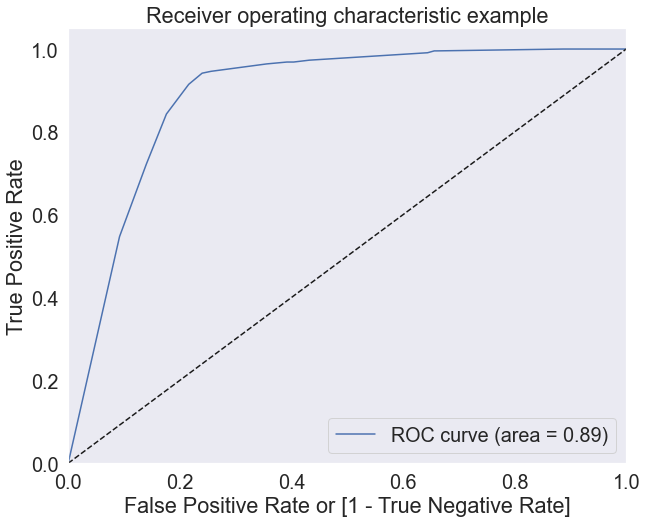

In [70]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Loan_Prob)

### Step: Finding the optimal cutoff point

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Loan_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Loan_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.049796,593,0,1,0,0,0,0,0,0,0,0,0
1,1,0.847521,270,1,1,1,1,1,1,1,1,1,1,0
2,0,0.847521,444,1,1,1,1,1,1,1,1,1,1,0
3,0,0.049796,607,0,1,0,0,0,0,0,0,0,0,0
4,0,0.847521,127,1,1,1,1,1,1,1,1,1,1,0


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.471459  1.000000  0.000
0.1   0.1  0.778013  0.968610  0.608
0.2   0.2  0.839323  0.946188  0.744
0.3   0.3  0.839323  0.946188  0.744
0.4   0.4  0.845666  0.941704  0.760
0.5   0.5  0.845666  0.941704  0.760
0.6   0.6  0.832981  0.843049  0.824
0.7   0.7  0.811839  0.775785  0.844
0.8   0.8  0.737844  0.547085  0.908
0.9   0.9  0.528541  0.000000  1.000


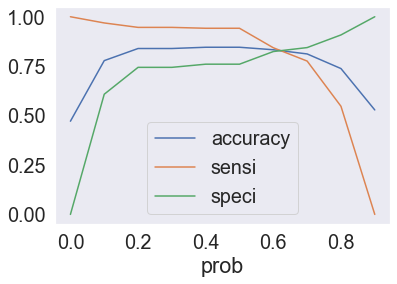

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Creating new column 'final_predicted' with 1 if Lead_Prob > 0.67 else 0


In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Loan_Prob.map( lambda x: 1 if x > 0.67 else 0)

y_train_pred_final.head()

,Converted,Loan_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.049796,593,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.847521,270,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.847521,444,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.049796,607,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.847521,127,1,1,1,1,1,1,1,1,1,1,0,1


### Evaluation Metrics for Final Cut Off Value = 0.67 (Training Set)

In [75]:
# Let's check the overall accuracy.

acf = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Accuracy = ", acf)

Accuracy =  0.8329809725158562


In [76]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[206,  44],
       [ 35, 188]], dtype=int64)

In [77]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
snf = TP / float(TP+FN)
print("Sensitivity = ", snf)

# Let us calculate specificity
spf = TN / float(TN+FP)
print("Specificity =", spf)


Sensitivity =  0.8430493273542601
Specificity = 0.824


In [79]:
# Calculate false postive rate - predicting converted when customer does not have actually converted

fprf = FP/ float(TN+FP)
print("False Positive Rate =", fprf)

False Positive Rate = 0.176


In [80]:
# positive predictive value 
ppvf = TP / float(TP+FP)
print ("Positive Predictive Value = ", ppvf )

Positive Predictive Value =  0.8103448275862069


In [81]:
# Negative predictive value
npvf =  TN / float(TN+ FN)
print("Negative predictive Value = ", npvf)

Negative predictive Value =  0.8547717842323651


In [82]:
# Importing required libraries
from sklearn.metrics import precision_score, recall_score

In [83]:
# Precision Score
pscf = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Precision Score =", pscf)

Precision Score = 0.8103448275862069


In [84]:
# Recall Score
rcsf = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Recall Score =", rcsf)

Recall Score = 0.8430493273542601


#### Precision-Recall Trade off

In [85]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0      1
 1      1
 2      0
 3      0
 4      0
       ..
 468    0
 469    0
 470    0
 471    1
 472    0
 Name: Converted, Length: 473, dtype: int32,
 0      0
 1      1
 2      1
 3      0
 4      1
       ..
 468    0
 469    1
 470    1
 471    1
 472    0
 Name: predicted, Length: 473, dtype: int64)

In [86]:
from sklearn.metrics import precision_recall_curve

In [87]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Loan_Prob)

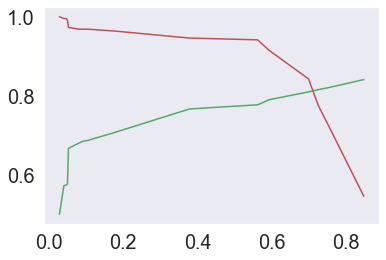

In [88]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step : Making predictions on the test set

In [89]:
X_test[['Loan_Amount_Term','Dependents','ApplicantIncome', "CoapplicantIncome", "LoanAmount"]] = scaler.transform(X_test[['Loan_Amount_Term','Dependents','ApplicantIncome', "CoapplicantIncome", "LoanAmount"]])


In [90]:
X_test = X_test[col]
X_test.head()

,Gender,Married,Credit_History,District 9,"Qureshi Square, New Delhi"
133,1,0,1,0,0
530,1,1,1,1,0
48,1,1,1,0,1
561,1,0,1,1,0
634,1,0,1,1,0


In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
y_test_pred = res.predict(X_test_sm)

In [93]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [94]:
# Checking the head
y_pred_1.head()

,0
133,0.754331
530,0.049796
48,0.698889
561,0.028135
634,0.028135


In [95]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [96]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [97]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [99]:
y_pred_final.head()

,Loan_Status_num,CustID,0
0,0,133,0.754331
1,0,530,0.049796
2,1,48,0.698889
3,0,561,0.028135
4,0,634,0.028135


In [100]:
 ## Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Loan_Prob', "Loan_Status_num": "Converted"})

In [101]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Loan_Prob'], axis=1)

In [102]:
y_pred_final.head()

,CustID,Converted,Loan_Prob
0,133,0,0.754331
1,530,0,0.049796
2,48,1,0.698889
3,561,0,0.028135
4,634,0,0.028135


In [103]:
y_pred_final['final_predicted'] = y_pred_final.Loan_Prob.map(lambda x: 1 if x > 0.67 else 0)

In [104]:
y_pred_final.head()

,CustID,Converted,Loan_Prob,final_predicted
0,133,0,0.754331,1
1,530,0,0.049796,0
2,48,1,0.698889,1
3,561,0,0.028135,0
4,634,0,0.028135,0


### Evaluation Metrics for Final Cut Off Value = 0.67 (Test Set)


In [105]:
act = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print ("Accuracy = ", act)

Accuracy =  0.7881773399014779


In [106]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[69, 18],
       [25, 91]], dtype=int64)

In [107]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
snt = TP / float(TP+FN)
print("Sensitivity = ", snt )

Sensitivity =  0.7844827586206896


In [109]:
# Let us calculate specificity
spt = TN / float(TN+FP)
print("Specificity = ", spt)

Specificity =  0.7931034482758621


In [110]:
psct = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
print("Precision_score = ", psct)

Precision_score =  0.8348623853211009


In [111]:
rcst = recall_score(y_pred_final.Converted, y_pred_final.final_predicted) 
print("Recall_score = ", rcst)

Recall_score =  0.7844827586206896


In [112]:
# Positive predictive value 
ppvt = TP / float(TP+FP)
print("Positive Predictive Value = ", ppvt )

Positive Predictive Value =  0.8348623853211009


In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
fprt = FP/ float(TN+FP)
print("False Positive Rate= ", fprt )

False Positive Rate=  0.20689655172413793


In [114]:
# Negative predictive value
npvt = TN / float(TN+ FN)
print ("Negative Predictive Value = ", npvt)

Negative Predictive Value =  0.7340425531914894


### Comparing evaluation metrics for both train and test set with cut off value of 0.67

In [115]:
print("Accuracy for predicted trained set = " , format(acf, '.3f'))
print("Sensitivity or Recall Score for predicted trained set = ",format(snf, '.3f'))
print("Precision Score for predicted trained set = ", format(pscf, '.3f'))
print("Specificity for predicted trained set = ", format(spf, '.3f' ))
print("False Positive Rate for predicted trained set = ", format(fprf, '.3f' ))
print("Positive Predictive Value for predicted trained set = ", format(ppvf, '.3f' ))
print("Negative Predictive Value for predicted trained set = ", format(npvf, '.3f' ))

print()

print("Accuracy for predicted test set = ", format(act, '.3f'))
print("Sensitivity or Recall Score for predicted test set =", format(snt, '.3f'))
print("Precision Score for predicted trained set = ", format(psct, '.3f'))
print("Specificity for predicted test set = ", format(spt, '.3f'))
print("False Positive Rate for predicted test set = ", format(fprt, '.3f' ))
print("Positive Predictive Value for predicted test set = ", format(ppvt, '.3f' ))
print("Negative Predictive Value for predicted test set = ", format(npvt, '.3f' ))

Accuracy for predicted trained set =  0.833
Sensitivity or Recall Score for predicted trained set =  0.843
Precision Score for predicted trained set =  0.810
Specificity for predicted trained set =  0.824
False Positive Rate for predicted trained set =  0.176
Positive Predictive Value for predicted trained set =  0.810
Negative Predictive Value for predicted trained set =  0.855

Accuracy for predicted test set =  0.788
Sensitivity or Recall Score for predicted test set = 0.784
Precision Score for predicted trained set =  0.835
Specificity for predicted test set =  0.793
False Positive Rate for predicted test set =  0.207
Positive Predictive Value for predicted test set =  0.835
Negative Predictive Value for predicted test set =  0.734


In [116]:
y_train_pred_final.head()

,Converted,Loan_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.049796,593,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.847521,270,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.847521,444,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.049796,607,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.847521,127,1,1,1,1,1,1,1,1,1,1,0,1


In [117]:
y_pred_final.head()

,CustID,Converted,Loan_Prob,final_predicted
0,133,0,0.754331,1
1,530,0,0.049796,0
2,48,1,0.698889,1
3,561,0,0.028135,0
4,634,0,0.028135,0


### Step: Concating and merging columns to create a dataframe which can be related to the variables like "Locality" and "Loan_ID"

In [118]:
data2 = [y_pred_final["CustID"], y_pred_final["Converted"], y_pred_final["Loan_Prob"],y_pred_final["final_predicted"] ]
df2 = pd.concat(data2, axis=1)

In [119]:
data = [y_train_pred_final["CustID"], y_train_pred_final["Converted"], y_train_pred_final["Loan_Prob"],y_train_pred_final["final_predicted"] ]
df1 = pd.concat(data, axis=1)

In [120]:
df1.head()

,CustID,Converted,Loan_Prob,final_predicted
0,593,1,0.049796,0
1,270,1,0.847521,1
2,444,0,0.847521,1
3,607,0,0.049796,0
4,127,0,0.847521,1


In [121]:
df2.head()

,CustID,Converted,Loan_Prob,final_predicted
0,133,0,0.754331,1
1,530,0,0.049796,0
2,48,1,0.698889,1
3,561,0,0.028135,0
4,634,0,0.028135,0


In [122]:
final = df1.append(df2)

In [123]:
final.sort_values(by=['CustID'], inplace=True, ascending=True)


In [124]:
final = final.set_index("CustID")

In [125]:
final.head()

,Converted,Loan_Prob,final_predicted
CustID,,,
0,0,0.561825,0
1,0,0.698889,1
2,1,0.698889,1
3,1,0.698889,1
4,1,0.698889,1


In [126]:
dtf = pd.read_csv("final_df1.csv")
dtf.head()

,Unnamed: 0,Loan_ID,Loan_Status,Gender,Married,Locality,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP001996,N,Male,No,"Qureshi Square, New Delhi",0,Graduate,No,20233,0,480,360,1,Rural
1,1,LP002191,N,Male,Yes,"Qureshi Square, New Delhi",0,Graduate,No,19730,5266,570,360,1,Rural
2,2,LP002699,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,17500,0,400,360,1,Rural
3,3,LP002527,Y,Male,Yes,"Qureshi Square, New Delhi",2,Graduate,Yes,16525,1014,150,360,1,Rural
4,4,LP002065,Y,Male,Yes,"Qureshi Square, New Delhi",3,Graduate,No,15000,0,300,360,1,Rural


In [127]:
data3 = [dtf["Loan_ID"], dtf["Locality"]]
df3 = pd.concat(data3, axis=1)

In [128]:

df3.reset_index(inplace=True)
df3.columns = ['CustID', 'LoanID', "Locality"]
df3 = df3.set_index("CustID")
df3.head()

,LoanID,Locality
CustID,,
0,LP001996,"Qureshi Square, New Delhi"
1,LP002191,"Qureshi Square, New Delhi"
2,LP002699,"Qureshi Square, New Delhi"
3,LP002527,"Qureshi Square, New Delhi"
4,LP002065,"Qureshi Square, New Delhi"


In [129]:
final.head()

,Converted,Loan_Prob,final_predicted
CustID,,,
0,0,0.561825,0
1,0,0.698889,1
2,1,0.698889,1
3,1,0.698889,1
4,1,0.698889,1


In [130]:
merged_left = pd.merge(left=final, right=df3, how='left', left_on='CustID', right_on='CustID')


### The df named "merged_left" is an amalgamation of train and test sets relating the "LoanID" and "Locality"

In [136]:
merged_left.head(15)

,Converted,Loan_Prob,final_predicted,LoanID,Locality
CustID,,,,,
0,0,0.561825,0,LP001996,"Qureshi Square, New Delhi"
1,0,0.698889,1,LP002191,"Qureshi Square, New Delhi"
2,1,0.698889,1,LP002699,"Qureshi Square, New Delhi"
3,1,0.698889,1,LP002527,"Qureshi Square, New Delhi"
4,1,0.698889,1,LP002065,"Qureshi Square, New Delhi"
5,0,0.698889,1,LP001859,"Qureshi Square, New Delhi"
6,1,0.698889,1,LP001401,"Qureshi Square, New Delhi"
7,0,0.561825,0,LP001100,"Qureshi Square, New Delhi"
8,0,0.378453,0,LP001519,"Qureshi Square, New Delhi"


In [131]:
new =merged_left.groupby(['Locality']).sum()


In [132]:
dff = round(100*(new/merged_left.groupby(["Locality"]).count()),2)

### The "dff" dataframe shows the actual prediction (converted) and the machine learning prediction(final_predicted) in terms of subgroups segregated in terms of percentage conversion

In [133]:
dff.drop(["Loan_Prob", "LoanID"], axis=1)

,Converted,final_predicted
Locality,,
"Amit Enclave, Gurgaon",69.57,65.22
District 9,3.98,0.00
"Hari Vihar, New Delhi",63.89,83.33
"Karimpur, New Delhi",61.54,84.62
"Naman Enclave, New Delhi",72.55,78.43
"Park Circus, New Delhi",80.00,76.00
"Qureshi Square, New Delhi",57.63,50.85
"Richmond, New Delhi",74.07,70.37
"Sukhdev Enclave, New Delhi",78.57,77.68


#### Interpretation:
- The District 9 which in reality had a loan rate of almost 4%, has been predicted by ML algorithm as 0% loan rate. The behaviour of the racist loan officer towards high educated and high median income customers living in the District 9 area have led the machine to predict that these customers don't deserve loans

In [134]:
### Saving the predicted file on both train-test dataset in csv format
merged_left.to_csv("logistic_final.csv")